In [1]:
from inaFaceGender import GenderImage
from inaFaceGender.face_classifier import Resnet50FairFaceGRA
import glob

2021-10-18 20:03:53.841367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 20:03:53.843651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 20:03:53.852406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 20:03:53.854678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 20:03:53.855717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [2]:
gi = GenderImage(verbose=True)

./media/1546923312_7cc94957e8_o.jpg
raw image ./media/1546923312_7cc94957e8_o.jpg


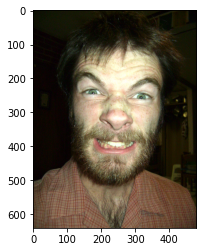

bbox: [108.66650247573853, 103.19684219360352, 386.03963470458984, 500.5086975097656], conf: 0.999998


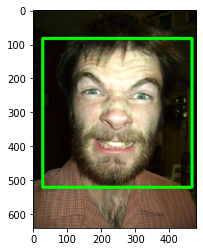

resulting image


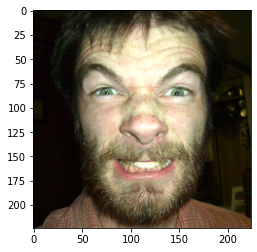

2021-10-18 20:04:11.719784: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-10-18 20:04:11.980321: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(28, 83, 465, 520), 'm', 9.746957356974773, 0.9999981]

./media/20091020222328!KnuthAtOpenContentAlliance.jpg
raw image ./media/20091020222328!KnuthAtOpenContentAlliance.jpg


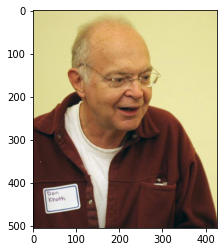

bbox: [122.14368379116058, 57.393279150128365, 277.0635694861412, 282.1009963750839], conf: 0.999598


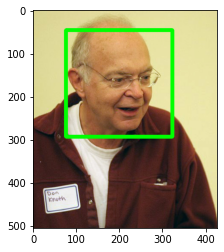

resulting image


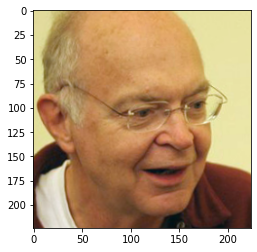

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(76, 46, 323, 293), 'm', 6.606970782680788, 0.99959785]

./media/800px-India_(236650352).jpg
raw image ./media/800px-India_(236650352).jpg


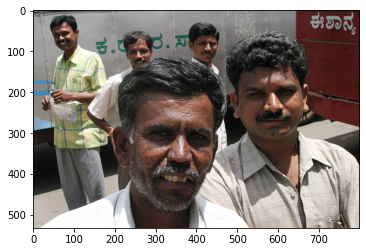

bbox: [501.6525077819824, 128.37764537334442, 656.5784645080566, 328.3189299106598], conf: 0.999988


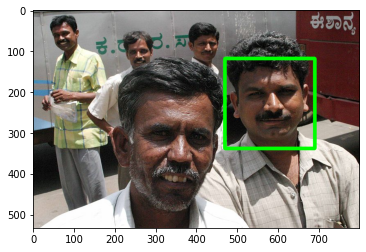

resulting image


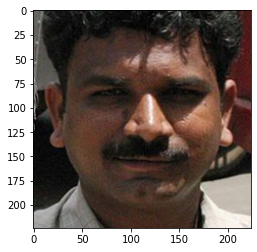

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(469, 118, 689, 338), 'm', 15.16191144990483, 0.99998796]

bbox: [246.0497784614563, 198.21387606859207, 439.4639492034912, 485.5670797228813], conf: 0.910372


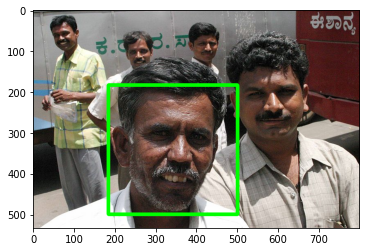

resulting image


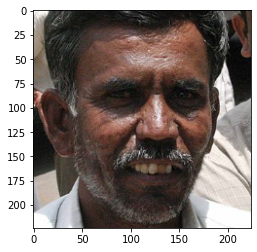

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(184, 183, 500, 499), 'm', 19.018275850571445, 0.9103719]

bbox: [391.94966554641724, 53.716668248176575, 451.5154457092285, 127.43419972062111], conf: 0.898624


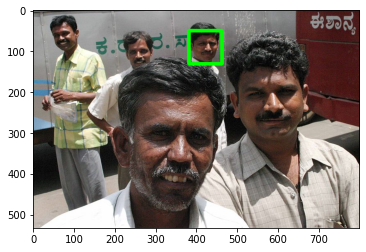

resulting image


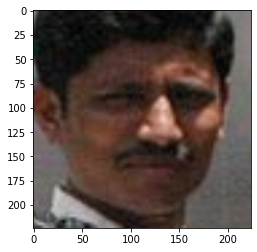

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(381, 50, 462, 131), 'm', 12.95690493371939, 0.89862376]

bbox: [50.747365951538086, 22.65920878946781, 105.10186910629272, 100.35440787672997], conf: 0.810649


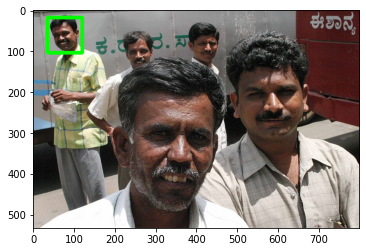

resulting image


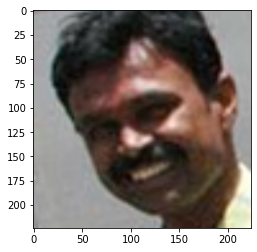

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(35, 18, 120, 104), 'm', 13.782114064812331, 0.8106492]

bbox: [233.10378313064575, 70.6419757604599, 289.4969439506531, 148.86956584453583], conf: 0.761900


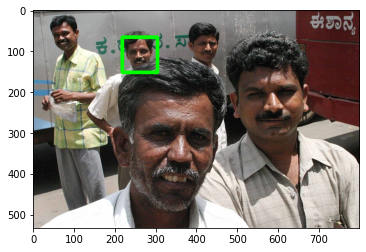

resulting image


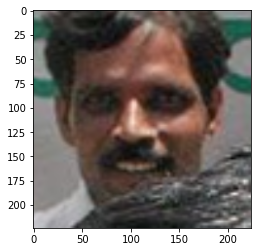

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(218, 66, 304, 152), 'm', 15.916698419518463, 0.76189953]

./media/Europa21_-_2.jpg
raw image ./media/Europa21_-_2.jpg


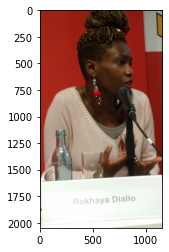

bbox: [545.904812335968, 260.8697452843189, 872.4543042182922, 784.5111449956894], conf: 0.987481


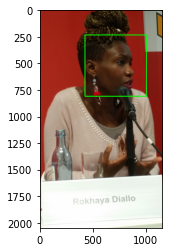

resulting image


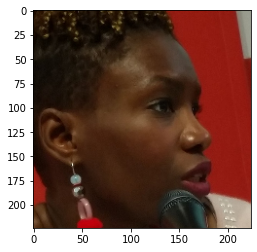

bounding box (x1, y1, x2, y2), sex label, sex classification decision function, face detection confidence
[(421, 234, 997, 810), 'f', -3.172436959956869, 0.9874812]



In [3]:
for e in sorted(glob.glob('./media/*.jpg')):
    
    print(e)
    gi(e)